In [52]:
import pandas as pd
import seaborn as sns
import plotly.express as pt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import numpy as np


In [2]:
dados = pd.read_excel("Recrutamento.xlsx")

In [3]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [4]:
dados.shape

(215, 15)

In [5]:
# retorna os valores únicos da coluna, parecido com a função DISTINCT do SQL
set(dados.status)

{'No', 'Yes'}

In [6]:
# traz o resumo dos dados pegando apenas as colunas que o formato seja inteiro e/ou float/double
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [7]:
# verifica se existem valores nulos nas colunas usando a função isna(), o sum serve para trazer os dados
# sumarizados, ou seja, somando todas as linhas da respectiva coluna e usa a função sort_values passando o
# parametro ascending = false para trazer os dados de forma descrescente
dados.isna().sum().sort_values(ascending=False)

salary            67
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
dtype: int64

C:\Users\gabri\AppData\Local\Temp\ipykernel_18792\1285165823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="salary", data=dados, palette="hls")


<AxesSubplot: xlabel='status', ylabel='salary'>

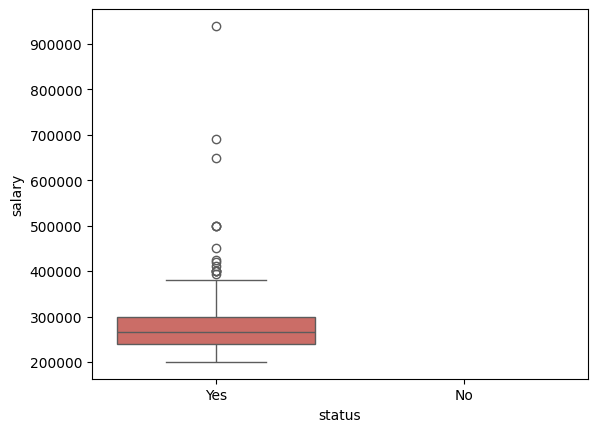

In [8]:
sns.boxplot(x="status", y="salary", data=dados, palette="hls")

In [9]:
# utiliza a função fillna() do pandas para preencher os valores nulos por 0 e usa o parametro inplace
# para substituir direto no dataset
dados["salary"].fillna(value=0, inplace=True)

In [10]:
dados.isna().sum().sort_values(ascending=False)

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot: xlabel='hsc_p'>

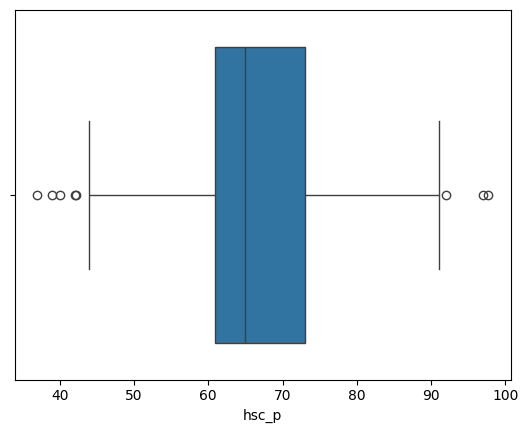

In [11]:
sns.boxplot(x="hsc_p", data=dados)

<AxesSubplot: xlabel='hsc_p', ylabel='Count'>

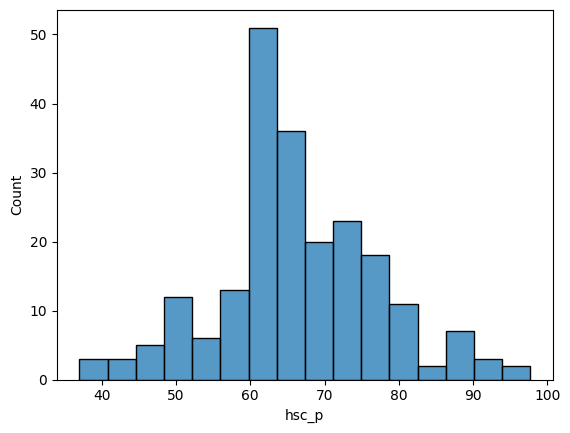

In [12]:
sns.histplot(data=dados, x="hsc_p")

<AxesSubplot: xlabel='degree_p'>

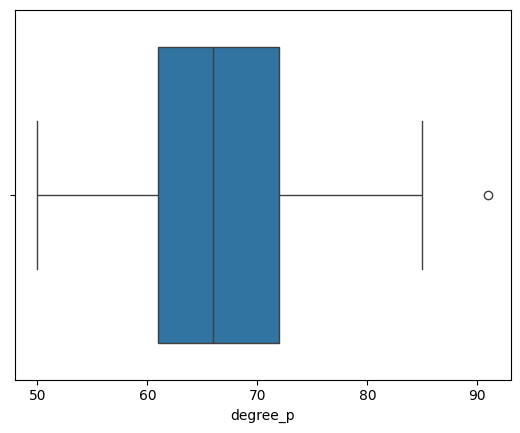

In [13]:
sns.boxplot(data=dados, x="degree_p")

<AxesSubplot: xlabel='degree_p', ylabel='Count'>

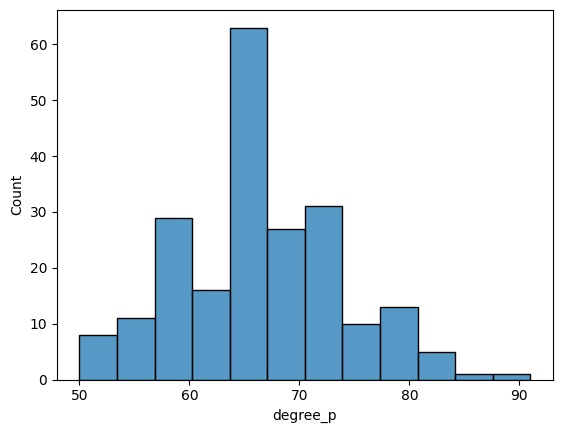

In [14]:
sns.histplot(data=dados, x="degree_p")

<AxesSubplot: xlabel='etest_p'>

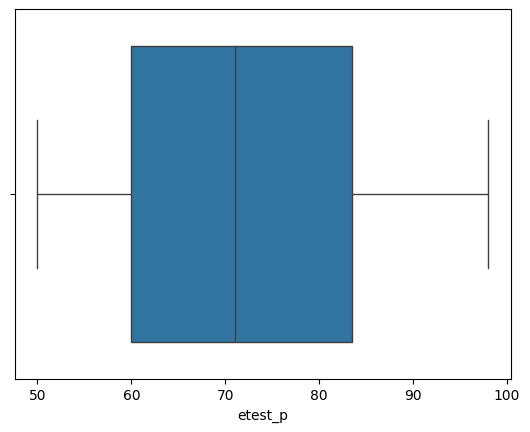

In [15]:
sns.boxplot(data=dados, x="etest_p")

<AxesSubplot: xlabel='mba_p'>

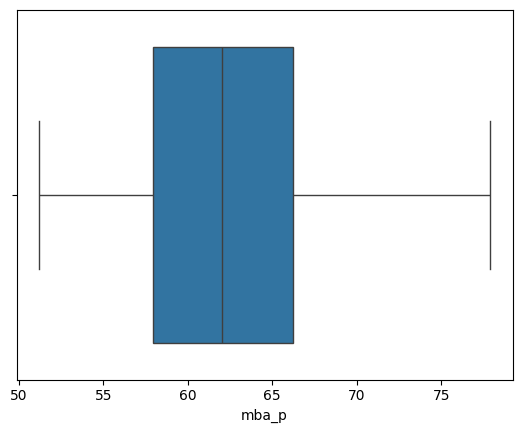

In [16]:
sns.boxplot(data=dados, x="mba_p")

<AxesSubplot: xlabel='salary'>

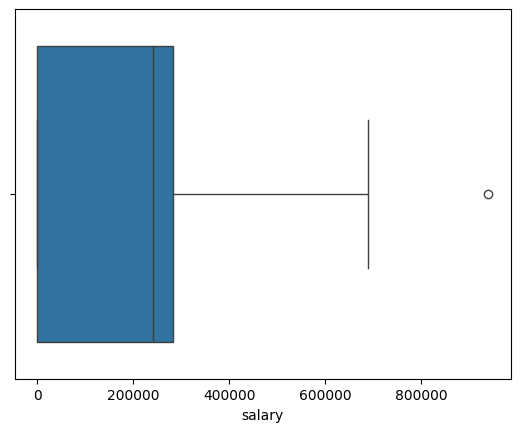

In [17]:
sns.boxplot(data=dados, x="salary")

<AxesSubplot: xlabel='salary', ylabel='Count'>

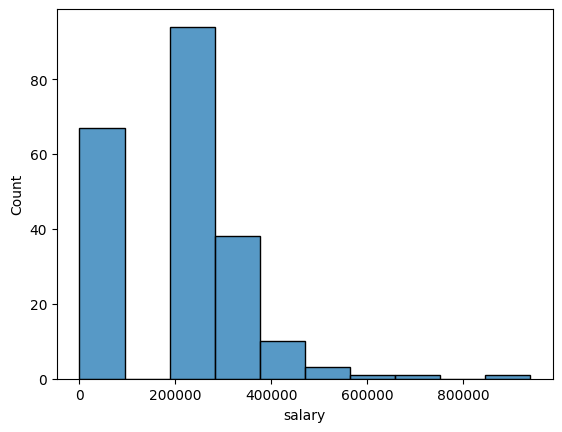

In [18]:
sns.histplot(data=dados, x="salary")

[Text(0.5, 20.049999999999997, 'MBA')]

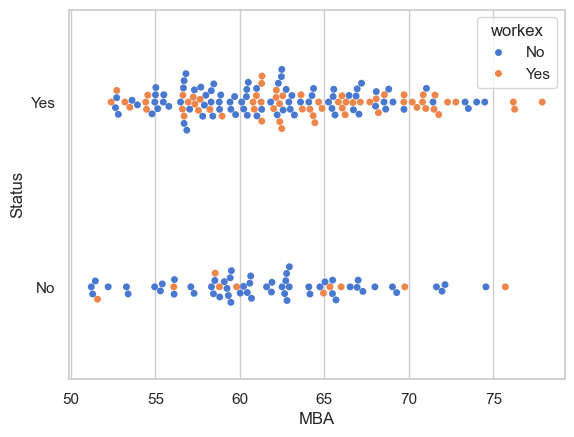

In [19]:
sns.set_theme(style="whitegrid", palette="muted")
ax=sns.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="Status")
ax.set(xlabel="MBA")

In [20]:
pt.violin(dados, y="salary", x="specialisation", color="gender", box=True, points="all")

<AxesSubplot: >

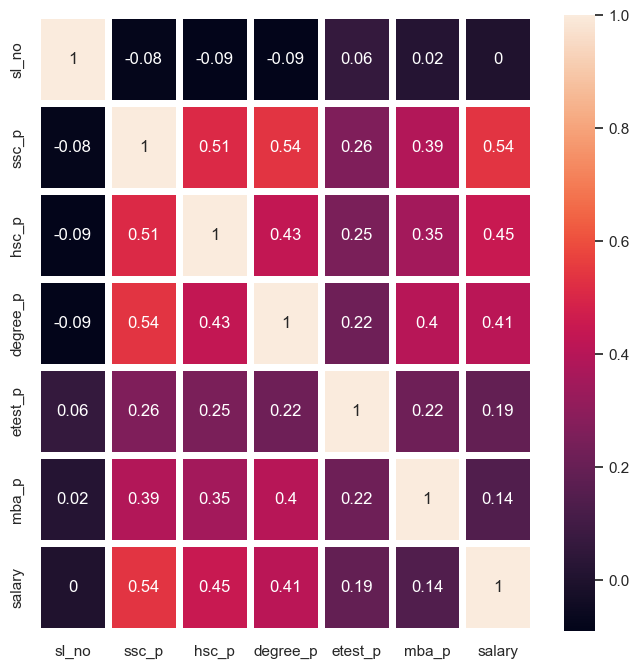

In [21]:
correlation_matriz = dados.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

In [22]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [23]:
colunas = ["gender", "workex", "specialisation", "status"]

label_encoder = LabelEncoder()

for col in colunas:
  dados[col] = label_encoder.fit_transform(dados[col])

In [24]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [25]:
dummy_hsc_s = pd.get_dummies(dados["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dados["degree_t"], prefix="dummy")

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

In [26]:
dados_dummy.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True


In [27]:
dados_dummy.drop(["hsc_s", "degree_t", "salary"], axis=1, inplace=True)

In [28]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


<AxesSubplot: >

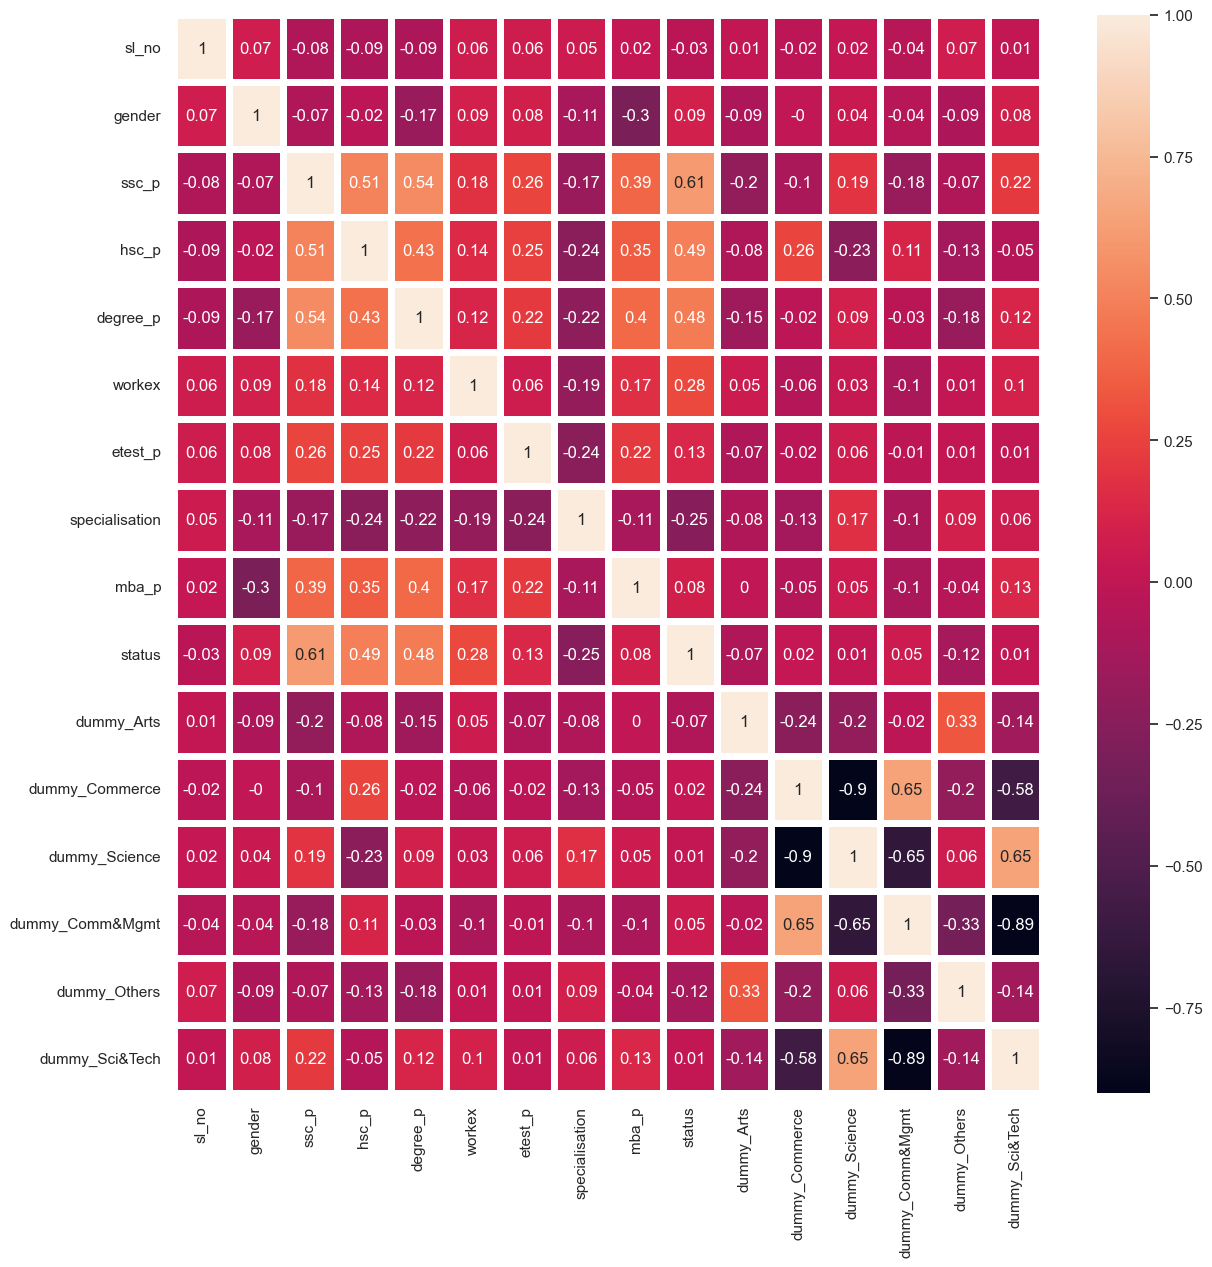

In [29]:
correlation_matriz = dados_dummy.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

In [30]:
x=dados_dummy[["ssc_p", "hsc_p", "degree_p", "workex", "mba_p"]]
y=dados_dummy[["status"]]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [32]:
x_train.shape

(172, 5)

In [33]:
x_test.shape

(43, 5)

In [34]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


In [35]:
scaler = StandardScaler()

scaler.fit(x_train)


x_train_escalonado = scaler.transform(x_train)

x_test_escalonado = scaler.transform(x_test)

In [36]:
x_train_escalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

In [42]:
error = []

y_train = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()


for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro Médio')

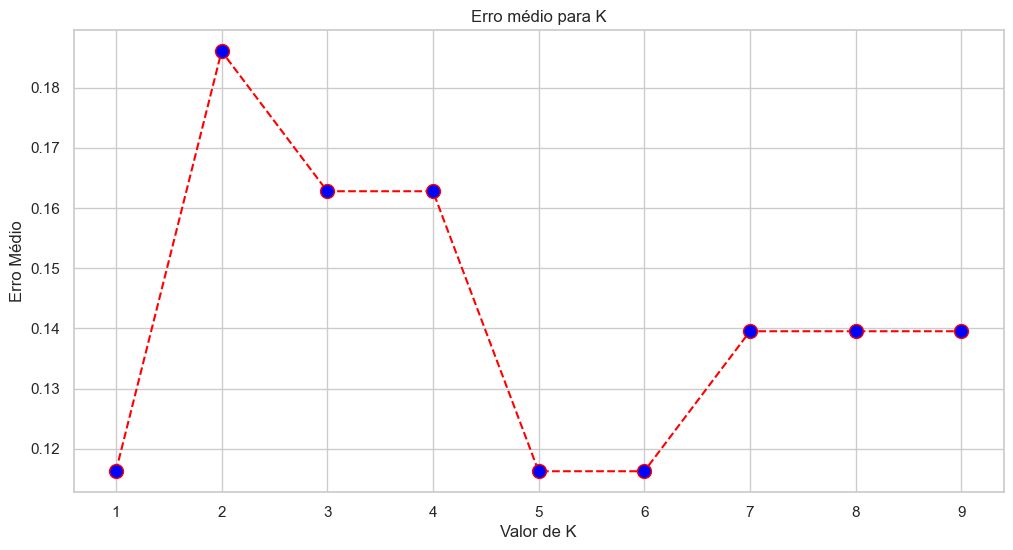

In [45]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue",markersize=10)

plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro Médio")

In [47]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

In [48]:
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [50]:
print(accuracy_score(y_test, y_predito))

0.8837209302325582


In [53]:
svm = Pipeline(
  [
    ("linear_svc", LinearSVC(C=1))
  ]
)

In [54]:
svm.fit(x_train_escalonado, y_train)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [57]:
y_predito_svm = svm.predict(x_test_escalonado)

In [58]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


In [59]:
y_predito_svm

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])